In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Resumido.csv")

del df['Unnamed: 0']

In [2]:
#df.loc[df['Aprobo'] == True, 'Aprobo'] = '1'
#df.loc[df['Aprobo'] == False, 'Aprobo'] = '0'

df['Aprobo' ] =df['Aprobado'].replace(['N','S'],['0','1'])
df['Derecho a Recuperatorio' ] =df['Derecho a Recuperatorio'].replace([False,True],['0','1'])
df['Derecho a Final' ] =df['Derecho a Final'].replace([False,True],['0','1'])

In [3]:
display(df)

,Indice,id_anony,Anho,Cod.Car.Sec,Nota.Final,Aprobado,1P,2P,Taller,Firma,Derecho a Recuperatorio,Derecho a Final,Primer.Rec,Segundo.Rec,Primer Intento,Segundo Intento,Calificacion,Aprobo
0,0.0,es_7719,2017,CIV-PLS13,NaN,N,2,0,0,2,0,0,0,0,0.0,0.0,0.0,0
1,1.0,es_1972,2017,CGF-PLS13,NaN,N,4,0,0,4,0,0,0,0,0.0,0.0,0.0,0
2,2.0,es_2129,2017,CIV-PLS13,3F-1,N,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0
3,3.0,es_2803,2017,CIV-PLS13,NaN,N,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
4,4.0,es_2441,2017,ELE-PLS13,2F-1,N,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,1546.0,es_7097,2019,CIV-PLS13,NaN,N,0,7,4,11,0,0,0,0,0.0,0.0,0.0,0
1547,1547.0,es_7099,2019,CIV-PLS13,NaN,N,4,0,0,4,0,0,0,0,0.0,0.0,0.0,0
1548,1548.0,es_7250,2019,CIV-PLS13,NaN,N,7,12,3,22,0,0,8,0,0.0,0.0,0.0,0
1549,1549.0,es_9820,2019,CIV-PLS13,1F-5,S,24,28,10,62,1,1,0,0,5.0,0.0,5.0,1


<h1>Modelo #1</h1>
Para el primer modelo a implementar, analizaremos si pasa la materia al conseguir firma. Los factores que se deben tener en cuenta para saber si pasa o no la materia solo con la firma son: La firma(Firma), que es la suma de los parciales y el taller; y finalmente su puntaje de taller (Taller), porque si no cumple con el puntaje minimo de taller (taller>=6) el alumno recursa directamente. Para este modelo predictivo, emplearemos la libreria sklearn y el modelo de regresion lineal

In [4]:
#Primero cargamos en un vector X1 todos los datos que tenemos del dataset sobre el primer y segundo parcial, como tambien el taller de cada alumno
X1=df[['Firma','Taller']]
X1=np.array(X1)
#Como solo buscamos saber si es que paso o no (no su nota final), en el vector Y1 se carga la columna "Aprobo"
y1=df[['Aprobo']]
y1=np.array(y1)
y1=np.ravel(y1)

In [5]:
#Aqui importamos las herramientas necesarias para utilizar una parte de los datos para el entrenamiento
from sklearn.model_selection import train_test_split

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4,random_state=101)

In [7]:
#Aqui se importan las librerias necesarias para crear y entrenar el modelo a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
#Aqui se declara al modelo a utilizar
logreg1 = LogisticRegression()

In [9]:
#Aqui se entrena al modelo con las vvariables de entrenamiento
logreg1.fit(X1_train,y1_train)

LogisticRegression()

Una vez entrenado el modelo, se realizan predicciones

In [10]:
y1_pred=logreg1.predict(X1_test)

Luego de realizar las predicciones, es necesario verificar el rendimiento de la prediccion. Para ello, es necesario utilizar la matriz de confusion

In [11]:
#Este comando sirve para importar las funciones que permiten crear la matriz de confusion
from sklearn.metrics import confusion_matrix

In [12]:
matriz1=confusion_matrix(y1_test,y1_pred)
display('Matriz de Confusion:')
print(matriz1)

'Matriz de Confusion:'

[[271  81]
 [ 73 196]]


In [13]:
#Ahora calculamos la exactitud del modelo, para ello, se importa la siguiente libreria
from sklearn.metrics import accuracy_score

In [14]:
exactitud1=accuracy_score(y1_test,y1_pred)*100
print('Exactitud del modelo: ',exactitud1,' %')

Exactitud del modelo:  75.2012882447665  %


Luego de haber terminado con este modelo, podemos implementar otros modelos con variables de entrada diferentes para asi seleccionar el modelo predictivo mas eficaz

<h1>Modelo #2</h1>
Para el segundo modelo a realizar, se tendra en cuenta el puntaje del primer parcial (1P), del segundo parcial (2P) y finalmente del taller (Taller) para determinar si es que el alumno pasa o no. Como en el primer modelo se explico detalladamente cada paso, para este modelo se omitiran algunas descripciones


In [15]:
#Modelo #2
X2=df[['1P','2P','Taller']]
X2=np.array(X2)
#Como solo buscamos saber si es que paso o no (no su nota final), en el vector Y1 se carga la columna "Aprobo"
y2=df[['Aprobo']]
y2=np.array(y2)
y2=np.ravel(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.6,random_state=101)

logreg2 = LogisticRegression()
logreg2.fit(X2_train,y2_train)\

y2_pred=logreg2.predict(X2_test)

matriz2=confusion_matrix(y2_test,y2_pred)
display('Matriz de Confusion:')
print(matriz2)

exactitud2=accuracy_score(y2_test,y2_pred)*100
print('Exactitud del modelo: ',exactitud2,' %')

'Matriz de Confusion:'

[[401 129]
 [ 79 322]]
Exactitud del modelo:  77.65843179377015  %


Como se puede apreciar, la exactitud del segundo modelo es mejor que la del primer modelo, eso indica que el rendimiento en los parciales en conjunto con el taller nos permite obtener una prediccion mas exacta en contraste a tomar directamente la firma del alumno y el taller

<h1>Modelo #3</h1>
Ahora se crea un nuevo modelo nuevo en donde solo se tendra en cuenta el rendimiento en los parciales para determinar si el alumno pasa o no

In [16]:
#Modelo #3
X3=df[['1P','2P']]
X3=np.array(X3)
#Como solo buscamos saber si es que paso o no (no su nota final), en el vector Y1 se carga la columna "Aprobo"
y3=df[['Aprobo']]
y3=np.array(y3)
y3=np.ravel(y3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.6,random_state=101)

logreg3 = LogisticRegression()
logreg3.fit(X3_train,y3_train)\

y3_pred=logreg3.predict(X3_test)

matriz3=confusion_matrix(y3_test,y3_pred)
display('Matriz de Confusion:')
print(matriz3)

exactitud3=accuracy_score(y3_test,y3_pred)*100
print('Exactitud del modelo: ',exactitud3,' %')

'Matriz de Confusion:'

[[385 145]
 [ 86 315]]
Exactitud del modelo:  75.18796992481202  %


Como se puede apreciar, el rendimiento en el taller nos permitio obtener una mayor exactitud en los otros modelos, por ende, es un factor clave para determinar si el alumno pasa o no

<h1>Modelo #4</h1>
Como se demostro que los datos del taller influyen en la prediccion que el alumno pase, se empleara un dataset que contiene exclusivamente los datos alumnos que tengan puntaje en su taller

In [17]:
#Aqui se crea el nuevo dataframe a utilizar, y se lo edita para que el procesamiento de sus datos ea mas sencillo
dft = pd.read_csv("ResumidoTaller.csv")

del dft['Unnamed: 0']
dft['Aprobo' ] =dft['Aprobado'].replace(['N','S'],['0','1'])
dft['Derecho a Recuperatorio' ] =dft['Derecho a Recuperatorio'].replace([False,True],['0','1'])
dft['Derecho a Final' ] =dft['Derecho a Final'].replace([False,True],['0','1'])

display(dft)

,Indice,id_anony,Anho,Cod.Car.Sec,Nota.Final,Aprobado,1P,2P,Taller,Firma,Derecho a Recuperatorio,Derecho a Final,Primer.Rec,Segundo.Rec,Primer Intento,Segundo Intento,Calificacion,Aprobo
0,1241.0,es_2441,2019,ELE-PLS13,NaN,N,14,18,5,37,0,0,0,0,0.0,0.0,0.0,0
1,1243.0,es_9733,2019,ELE-PLS13,NaN,N,8,4,7,19,1,0,0,0,0.0,0.0,0.0,0
2,1244.0,es_3106,2019,MEC-PLS13,NaN,N,9,11,7,27,1,0,14,0,0.0,0.0,0.0,0
3,1246.0,es_9734,2019,ELE-PLS13,1F-5,S,22,35,8,65,1,1,0,0,5.0,0.0,5.0,1
4,1247.0,es_3648,2019,IND-PLS13,1F-1,N,21,8,9,38,1,1,0,0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1545.0,es_9819,2019,ELE-PLS13,1F-4,S,21,23,10,54,1,1,0,0,4.0,0.0,4.0,1
240,1546.0,es_7097,2019,CIV-PLS13,NaN,N,0,7,4,11,0,0,0,0,0.0,0.0,0.0,0
241,1548.0,es_7250,2019,CIV-PLS13,NaN,N,7,12,3,22,0,0,8,0,0.0,0.0,0.0,0
242,1549.0,es_9820,2019,CIV-PLS13,1F-5,S,24,28,10,62,1,1,0,0,5.0,0.0,5.0,1


In [18]:
#Modelo #4
X4=dft[['1P','2P','Taller']]
X4=np.array(X4)
#Como solo buscamos saber si es que paso o no (no su nota final), en el vector Y1 se carga la columna "Aprobo"
y4=dft[['Aprobo']]
y4=np.array(y4)
y4=np.ravel(y4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.6,random_state=101)

logreg4 = LogisticRegression()
logreg4.fit(X4_train,y4_train)\

y4_pred=logreg4.predict(X4_test)

matriz4=confusion_matrix(y4_test,y4_pred)
display('Matriz de Confusion:')
print(matriz4)

exactitud4=accuracy_score(y4_test,y4_pred)*100
print('Exactitud del modelo: ',exactitud4,' %')

'Matriz de Confusion:'

[[88  6]
 [ 9 44]]
Exactitud del modelo:  89.79591836734694  %


Como se puede apreciar, al trabajar unicamente con los alumnos que tenian puntaje de taller, la exactitud del modelo incremento significativamente

<h1>Modelo #5</h1>
Como todos los alumnos con puntaje de taller son del 2019, se realizara una modelo que incluya a todos los alumnos de ese anho para comprobar si es posible aumentar la exactitud en la prediccion

In [19]:
#Aqui se crea el nuevo dataframe a utilizar, y se lo edita para que el procesamiento de sus datos ea mas sencillo
df019 = pd.read_csv("Resumido2019.csv")

del df019['Unnamed: 0']
df019['Aprobo' ] =df019['Aprobado'].replace(['N','S'],['0','1'])
df019['Derecho a Recuperatorio' ] =df019['Derecho a Recuperatorio'].replace([False,True],['0','1'])
df019['Derecho a Final' ] =df019['Derecho a Final'].replace([False,True],['0','1'])

display(df019)

,Indice,id_anony,Anho,Cod.Car.Sec,Nota.Final,Aprobado,1P,2P,Taller,Firma,Derecho a Recuperatorio,Derecho a Final,Primer.Rec,Segundo.Rec,Primer Intento,Segundo Intento,Calificacion,Aprobo
0,1086.0,es_272,2019,MEC-PLS13,2F-1,N,8,16,0,24,0,0,36,0,1.0,0.0,1.0,0
1,1087.0,es_273,2019,ELE-PLS13,NaN,N,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
2,1088.0,es_8913,2019,ELE-PLS13,2F-1,N,9,20,0,29,0,0,26,0,1.0,0.0,1.0,0
3,1089.0,es_3177,2019,CIV-PLS13,NaN,N,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
4,1090.0,es_619,2019,CIV-PLS13,NaN,N,5,33,0,38,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,1546.0,es_7097,2019,CIV-PLS13,NaN,N,0,7,4,11,0,0,0,0,0.0,0.0,0.0,0
461,1547.0,es_7099,2019,CIV-PLS13,NaN,N,4,0,0,4,0,0,0,0,0.0,0.0,0.0,0
462,1548.0,es_7250,2019,CIV-PLS13,NaN,N,7,12,3,22,0,0,8,0,0.0,0.0,0.0,0
463,1549.0,es_9820,2019,CIV-PLS13,1F-5,S,24,28,10,62,1,1,0,0,5.0,0.0,5.0,1


In [20]:
#Modelo #5
X5=df019[['1P','2P','Taller']]
X5=np.array(X5)
#Como solo buscamos saber si es que paso o no (no su nota final), en el vector Y1 se carga la columna "Aprobo"
y5=df019[['Aprobo']]
y5=np.array(y5)
y5=np.ravel(y5)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.6,random_state=101)

logreg5 = LogisticRegression()
logreg5.fit(X5_train,y5_train)\

y5_pred=logreg5.predict(X5_test)

matriz5=confusion_matrix(y5_test,y5_pred)
display('Matriz de Confusion:')
print(matriz5)

exactitud5=accuracy_score(y5_test,y5_pred)*100
print('Exactitud del modelo: ',exactitud5,' %')

'Matriz de Confusion:'

[[150  31]
 [ 22  76]]
Exactitud del modelo:  81.00358422939068  %


Al anhadir alumnos que no cumplen con el requisito de taller en el modelo, la exactitud del mismo disminuyo. Por ende, es necesario que se instroduzdan los datos de taller para mejorar la exactitud en la prediccion

<h1>Conclusion</h1>
Debido a su mayor exactitud y a lo sencillos que son los datos en la entrada, se selecciona el Modelo #4
como el mejor modelo predictivo

<h1>Graficos</h1>
Para poder apreciar los resultados obtenidos, se pueden implementar librerias cuya finalidad es realizar graficos. La libreria 'seaborn' es una de ellas. Con esta libreria, se realizara el grafico de la regresion logistica como tambien el de la matriz de confusion del modelo mas eficaz

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
sns.set_theme(color_codes=True)

<AxesSubplot:>

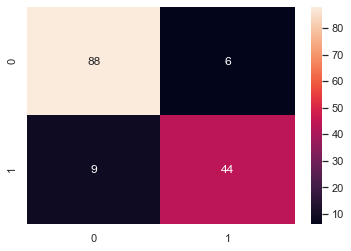

In [23]:
sns.heatmap(matriz4, annot=True)

In [29]:
from sklearn.metrics import classification_report
reporte=classification_report(y4_test,y4_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        94
           1       0.88      0.83      0.85        53

    accuracy                           0.90       147
   macro avg       0.89      0.88      0.89       147
weighted avg       0.90      0.90      0.90       147

